### Loading the necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_inspection import print_categorical_value_counts, plot_salary_by_experience

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Loading the data and inspecting it

In [3]:
df = pd.read_csv("salary_prediction_data.csv")
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
print_categorical_value_counts(df)

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64
__________________________________________________
__________________________________________________
Location
Suburban    345
Rural       345
Urban       310
Name: count, dtype: int64
__________________________________________________
__________________________________________________
Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64
__________________________________________________
__________________________________________________
Gender
Male      516
Female    484
Name: count, dtype: int64
__________________________________________________
__________________________________________________


In [6]:
# checking if Experience feature has any negative values which is not normal
(df["Experience"] < 0).sum()

0

In [7]:
# checking if Age feature has any values less than 18 which is not normal since the youngest person in the data has
# already finished high scool as we have already seen in the education column
(df["Age"] < 18).sum()

0

## insights 

### 1- categorcial variables 
Distribution is fairly balanced across categories.    
This suggests the dataset has good representation across education levels, without extreme imbalance.  

Education and location :  
These variables are ordinal (will check it using visualization too) so ordinal enocing would be suitable for them.

Job Title :  
Could be interesting to compare whether higher-ranking roles (Director, Manager) have consistently higher salaries.  

Gender :  
Will explore potential gender-based salary differences .  

### 2- numerical variables 
age and experience :  
doesnt have any upnormal values will explore how they affect the salary    
experience is expected to be highly linear with the salary  

## Next steps: 
Analyze how each of these categories influences salary using visualization + statistical tests.

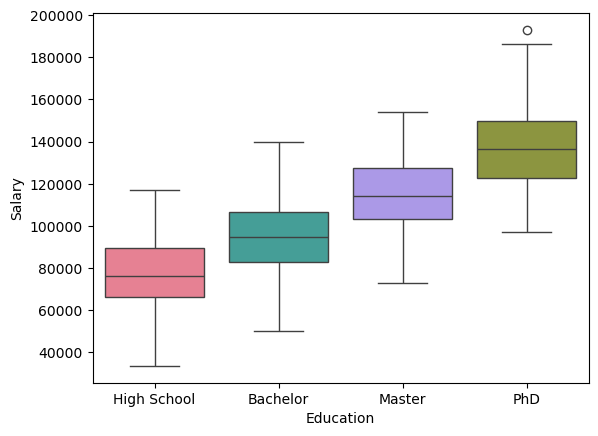

In [8]:
order = ["High School", "Bachelor", "Master", "PhD"]

sns.boxplot(x="Education", y="Salary", data=df, order=order, palette="husl", hue="Education")
plt.show()

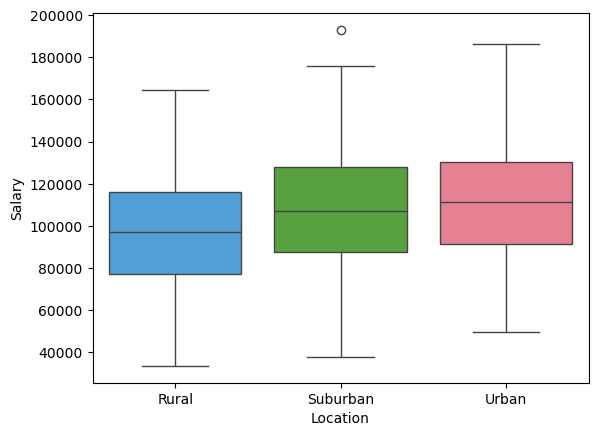

In [9]:
order = ["Rural", "Suburban", "Urban"]
 
sns.boxplot(x="Location", y="Salary", data=df, order=order, palette="husl", hue="Location")
plt.show()

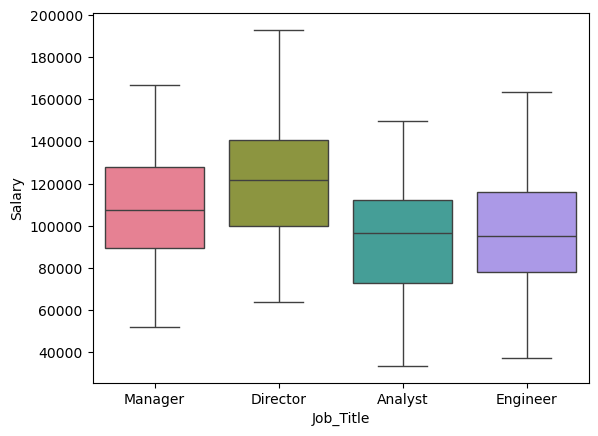

In [10]:
sns.boxplot(x="Job_Title", y="Salary", data=df, palette="husl", hue="Job_Title")
plt.show()

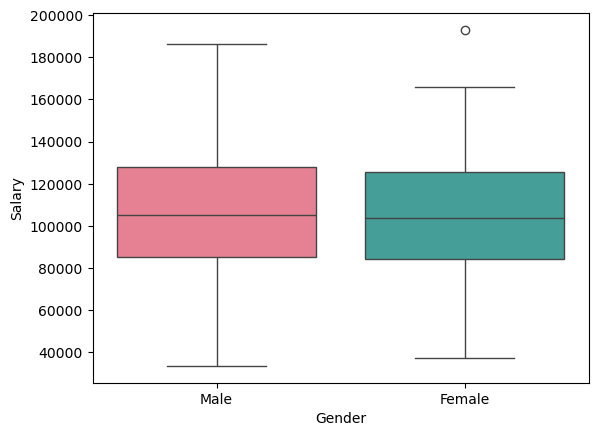

In [11]:
sns.boxplot(x="Gender", y="Salary", data=df, palette="husl", hue="Gender")
plt.show()

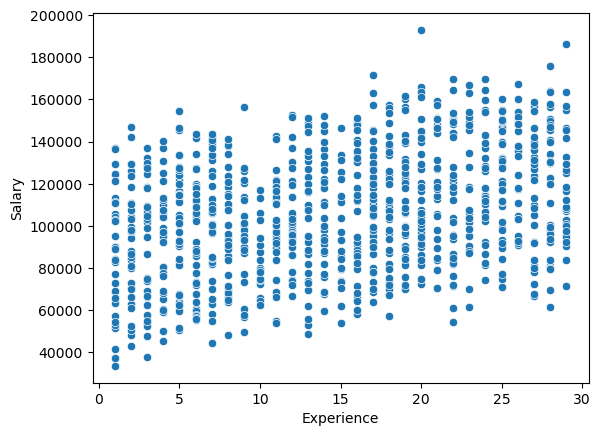

In [12]:
sns.scatterplot(x="Experience", y="Salary", data=df)
plt.show()

c:\Users\O6U20\OneDrive\Desktop\Programming\Vs Code\archive (1)\New folder\data_inspection.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=exp_groups, y=df["Salary"], palette="husl")


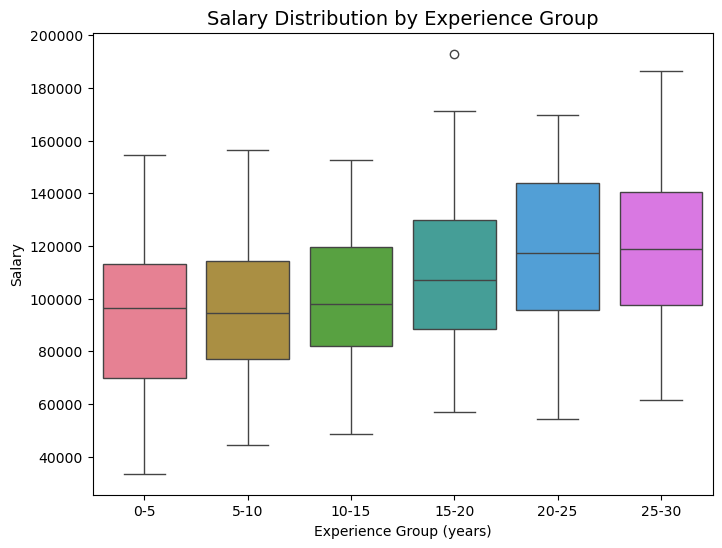

In [24]:
plot_salary_by_experience(df)

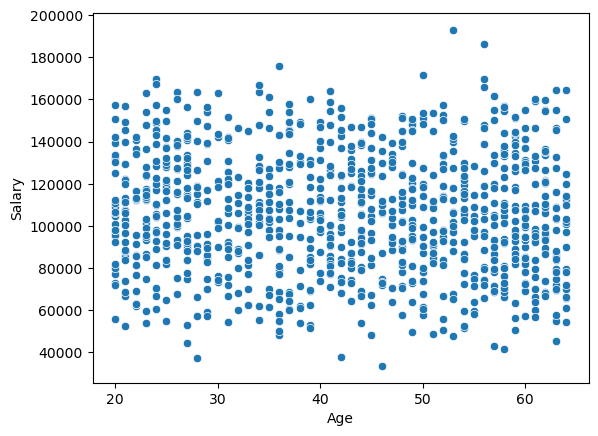

In [14]:
sns.scatterplot(x="Age", y="Salary", data=df)
plt.show()

In [15]:
df.drop(columns=['Age', 'Gender'], inplace=True)

In [16]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Salary'], dtype='object')

In [17]:
X = df.drop(columns=['Salary'])
y = df['Salary']
X.head()

,Education,Experience,Location,Job_Title
0,High School,8,Urban,Manager
1,PhD,11,Suburban,Director
2,Bachelor,28,Suburban,Manager
3,High School,29,Rural,Director
4,PhD,25,Urban,Analyst


In [18]:
X.columns

Index(['Education', 'Experience', 'Location', 'Job_Title'], dtype='object')

In [19]:
# Example: Define the order for Education and Location
education_order = ["High School", "Bachelor", "Master", "PhD"]
location_order = ["Rural", "Suburban", "Urban"]

# Create the encoder
encoder = OrdinalEncoder(categories=[education_order, location_order])

# Apply encoding
X[["Education", "Location"]] = encoder.fit_transform(X[["Education", "Location"]])


# One-hot encode Job_Title
encoder = OneHotEncoder(sparse_output=False, drop='first')
job_encoded = encoder.fit_transform(df[["Job_Title"]])

# Create a DataFrame with encoded columns
job_encoded_df = pd.DataFrame(job_encoded, columns=encoder.get_feature_names_out(["Job_Title"]))

# Concatenate back to X (dropping the original Job_Title)
X = pd.concat([X.drop(columns=["Job_Title"]), job_encoded_df], axis=1)

X.head(10)


,Education,Experience,Location,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
0,0.0,8,2.0,0.0,0.0,1.0
1,3.0,11,1.0,1.0,0.0,0.0
2,1.0,28,1.0,0.0,0.0,1.0
3,0.0,29,0.0,1.0,0.0,0.0
4,3.0,25,2.0,0.0,0.0,0.0
5,3.0,19,0.0,1.0,0.0,0.0
6,3.0,4,0.0,1.0,0.0,0.0
7,3.0,13,1.0,1.0,0.0,0.0
8,1.0,20,2.0,0.0,1.0,0.0
9,3.0,14,2.0,0.0,0.0,0.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# ---------------------------
# Define models and parameter grids
# ---------------------------

models = {
    "LinearRegression": (LinearRegression(), {}),

    "Ridge": (
        Ridge(),
        {"alpha": [0.1, 1, 10, 100]}
    ),

    "Lasso": (
        Lasso(max_iter=10000),
        {"alpha": [0.001, 0.01, 0.1, 1, 10]}
    ),

    "KNN": (
        KNeighborsRegressor(),
        {
            "n_neighbors": [3, 5, 7, 10],
            "weights": ["uniform", "distance"]
        }
    ),

    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [2, 3, 5],
            "min_samples_split": [2, 5, 10]
        }
    ),

    "ExtraTrees": (
        ExtraTreesRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [2, 3, 5],
            "min_samples_split": [2, 5, 10]
        }
    ),

    "AdaBoost": (
        AdaBoostRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1]
        }
    ),

    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 4]
        }
    ),

    "XGBoost": (
        XGBRegressor(random_state=42, objective="reg:squarederror",
                     tree_method="hist", device="cpu"),
        {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [2, 3, 4]
        }
    )
}


In [22]:
# ---------------------------
# Run Grid Search for each model
# ---------------------------
best_models = {}

for name, (model, params) in models.items():
    print(f"\n🔎 Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} best params: {grid.best_params_}")
    print(f"{name} R2 Score: {r2:.4f}")

# ---------------------------
# Compare models
# ---------------------------
print("\n✅ Summary of R2 scores:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{name}: {r2_score(y_test, y_pred):.4f}")


🔎 Training LinearRegression...
LinearRegression best params: {}
LinearRegression R2 Score: 0.8702

🔎 Training Ridge...
Ridge best params: {'alpha': 0.1}
Ridge R2 Score: 0.8701

🔎 Training Lasso...
Lasso best params: {'alpha': 0.001}
Lasso R2 Score: 0.8702

🔎 Training KNN...
KNN best params: {'n_neighbors': 7, 'weights': 'distance'}
KNN R2 Score: 0.7636

🔎 Training RandomForest...
RandomForest best params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
RandomForest R2 Score: 0.8387

🔎 Training ExtraTrees...
ExtraTrees best params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
ExtraTrees R2 Score: 0.8296

🔎 Training AdaBoost...
AdaBoost best params: {'learning_rate': 1, 'n_estimators': 50}
AdaBoost R2 Score: 0.8015

🔎 Training GradientBoosting...
GradientBoosting best params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
GradientBoosting R2 Score: 0.8644

🔎 Training XGBoost...
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 2, 'n_es